<a href="https://www.kaggle.com/code/hilalalpak/coffee-bean-sales-rfm-crm?scriptVersionId=180502844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color: black; border-radius: 8px; background-color: #A0522D; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center;"> VERİ SETİNİN İÇERİĞİ </p> 
</div>
<div style="background-image: url('https://cafe.wohha.com/wp-content/uploads/2019/01/blog01.jpg'); background-size: cover; padding: 10px; border-radius: 8px; text-align: center;">
    <div style="display:inline-block; width:40%; margin-right:5%;">
        <div style="border: 2px solid #333333; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#D2B48C ;">
            <p style="font-weight:bold; color:black; margin:0;font-size: 150%;"> Orders Worksheet </p>
            <ul style="list-style-type:none; padding-left:0; text-align:left; margin:0;">
                <li> <strong> Order ID: </strong> Her kahve siparişi için eşsiz tanımlayıcı. </li>
                <li> <strong> Order Date: </strong> Siparişin verildiği tarih. </li>
                <li> <strong> Customer ID: </strong> Müşteri tanımlayıcı. </li>
                <li> <strong> Product ID: </strong> Her kahve ürünü için benzersiz bir tanımlayıcı. </li>
                <li> <strong> Quantity: </strong> Sipariş edilen kahve ürününün miktarı. </li>
            </ul>
        </div>
    </div>
    <div style="display:inline-block; text-align:left; margin-bottom:10px;">
        <div style="border: 2px solid #333333; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#D2B48C;">
            <p style="font-weight:bold; color:black; margin:0; font-size: 150%;"> Customers Worksheet </p>
            <ul style="list-style-type:none; padding-left:0; text-align:left; margin:0;">
                <li> <strong> Customer ID: </strong> Her müşteri için benzersiz bir tanımlayıcı. </li>
                <li> <strong> Customer Name: </strong> Müşterinin adı. </li>
                <li> <strong> Email Address: </strong> Müşteriler için iletişim bilgileri. </li>
                <li> <strong> Phone Number: </strong> Müşteriler için başka bir iletişim bilgisi. </li>
                <li> <strong> And more: </strong> Segmentasyon ve analiz için çok çeşitli müşteri özelliklerini keşfedin. </li>
            </ul>
        </div>
    </div>
    <div style="display:inline-block; text-align:left; margin-bottom:10px;">
        <div style="border: 2px solid #333333; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#D2B48C;">
            <p style="font-weight:bold; color:black; margin:0; font-size: 150%;"> Products Worksheet </p>
            <ul style="list-style-type:none; padding-left:0; text-align:left; margin:0;">
                <li> <strong> Product ID: </strong> Her kahve ürünü için benzersiz bir tanımlayıcı. </li>
                <li> <strong> Coffee Type: </strong> Arabica veya Robusta gibi kahvenin türü veya karışımı. </li>
                <li> <strong> Roast Type: </strong> Açık, orta veya koyu kızartma dahil kızartma seviyesi. </li>
                <li> <strong> Size: </strong> Ürün boyutu hakkında bilgi. </li>
                <li> <strong> Unit Price: </strong> Kahve ürününün tek bir biriminin fiyatı. </li>
                <li> <strong> Price Per 100g: </strong> Ayrıntılı fiyat karşılaştırmaları için 100 gram başına fiyat. </li>
                <li> <strong> Profit: </strong> Her kahve ürününün karlılığına dair içgörüler. </li>
            </ul>
        </div>
    </div>
</div>




In [1]:
import sys
import subprocess

def install_package(package):
    process = subprocess.Popen([sys.executable, '-m', 'pip', 'install', package],
                               stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

install_package('lifetimes')

In [2]:
#Kütüphaneler
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import numpy as np
import seaborn as sns
import warnings
import sys

#Genel Ayarlar
if not sys.warnoptions:
    warnings.simplefilter("ignore")

    from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df_customers = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name="customers")
df_products = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name="products")
df_orders = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name="orders")

<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color: #4169E1; color: white;">
    VERİ TEMİZLEME
</div>


In [4]:
print("CUSTOMERS".center(50,'-'))
df_customers.head()
print("PRODUCTS".center(50,'-'))
df_products.head()
print("ORDERS".center(50,'-'))
df_orders.head()

--------------------CUSTOMERS---------------------


,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


---------------------PRODUCTS---------------------


,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2000,3.8850,1.9425,0.3496
1,A-L-0.5,Ara,L,0.5000,7.7700,1.5540,0.6993
2,A-L-1,Ara,L,1.0000,12.9500,1.2950,1.1655
3,A-L-2.5,Ara,L,2.5000,29.7850,1.1914,2.6806
4,A-M-0.2,Ara,M,0.2000,3.3750,1.6875,0.3037


----------------------ORDERS----------------------


,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color: #556B2F; color: white; padding: 10px; border-radius: 8px;">
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="font-size: 15px; margin-bottom: 5px;"> <strong>►</strong> Değerlendirmelerimi daha rahat yapabilmek adına 3 csv dosyasını, ortak değişkenlere göre, tek dataframe haline getireceğim.</li>
        <li style="font-size: 15px; margin-bottom: 5px;"> <strong>►</strong> Bu birleştirme kısmına geçmeden önce, eksik değerler var mı kontrol etmek istiyorum.</li>
    </ul>
</div>

In [5]:
df_customers.isnull().sum()
df_products.isnull().sum()
df_orders.isnull().sum()

Customer ID         0
Customer Name       0
Email             204
Phone Number      130
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64

Product ID        0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Price per 100g    0
Profit            0
dtype: int64

Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name    1000
Email            1000
Country          1000
Coffee Type      1000
Roast Type       1000
Size             1000
Unit Price       1000
Sales            1000
dtype: int64

In [6]:
# Aşağıdaki sütunların tamamı boş olduğu için data içinden çıkaracağım.
delete = ["Customer Name", "Email", "Country", "Coffee Type", "Roast Type", "Size", "Unit Price", "Sales"]
df_orders.drop(delete, axis=1, inplace=True)

In [7]:
# 3 veriyi tek dataframe altında toplayacağım.

df = pd.merge(df_orders, df_customers, on="Customer ID")
df = pd.merge(df, df_products, on="Product ID")
df_ = df.copy()
df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0000,9.9500,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5000,8.2500,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0000,12.9500,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0000,13.7500,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5000,27.4850,1.0994,1.6491


In [8]:
# Datamızı daha temiz ve net hale getirmek için değerlendirmeye almayacağım tüm değişkenleri df içerisinden sileceğim.
unnecessary = ["Customer Name", "Email", "Phone Number", "Address Line 1", "City", "Country", "Postcode"]
df.drop(unnecessary, axis=1, inplace=True)

<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color: #4169E1; color: white;">
    VERİ ÖN İŞLEME
</div>

In [9]:
def check_df(dataframe, head=5):
    print("SHAPE".center(50,'-'))
    print(dataframe.shape)
    print("INFO".center(50,"-"))
    print(dataframe.info())
    print("MISSING VALUES".center(50,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" UNIQUE VALUES ".center(70,'-'))
    print(dataframe.nunique())
    
check_df(df)

----------------------SHAPE-----------------------
(1000, 12)
-----------------------INFO-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Loyalty Card    1000 non-null   object        
 6   Coffee Type     1000 non-null   object        
 7   Roast Type      1000 non-null   object        
 8   Size            1000 non-null   float64       
 9   Unit Price      1000 non-null   float64       
 10  Price per 100g  1000 non-null   float64       
 11  Profit          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), obje

<div style="background-color: #556B2F; color: white; padding: 10px; border-radius: 8px;">
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="font-size: 14px; margin-bottom: 5px;"> <strong>►</strong> Quantity, Loyalty Card, Coffee Type, Roast Type ve Size sütunlarındaki eşsiz değer sayılarından yola çıkarak, kategorik tipte olabileceklerini düşünüyorum.</li>
        <li style="font-size: 14px; margin-bottom: 5px;"> <strong>►</strong> Customer ID elimizde mevcut olduğu için ve eksik değer içeren; Email, Phone Number ve Customer Name kolonlarını sileceğim.</li>
        <li style="font-size: 14px; margin-bottom: 5px;"> <strong>►</strong> Yukarıda belirttiğim değişkenleri kaldırma sebeplerimden bir diğeri de ileriki hesaplamalarımda işime yaramayacak bilgilerden oluşması.</li>
        <li style="font-size: 14px; margin-bottom: 5px;"> <strong>►</strong> Customer ID değerinden 913 tane gözüküyor fakat 1000 değer girilmiş. Bu kişileri analiz edip tekillleştireceğim.</li>
    </ul>
</div>


In [10]:
# Gizlenmiş kategorik değişkenleri yakalamak için grab_col_names fonksiyonumu getiriyorum.

def grab_col_names(dataframe, cat_th=10, car_th=20):
 
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['category', 'object', 'bool']]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ['int', 'int32', 'int64', 'float',
                                                                                   'float32', 'float64']]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ['category', 'object']]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['int64', 'float64']]
    num_cols = [col for col in num_cols if col not in cat_cols]

    # Print summary information
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols,num_cols, cat_but_car

grab_col_names(df)

Observations: 1000
Variables: 12
cat_cols: 5
num_cols: 3
cat_but_car: 3
num_but_cat: 2


(['Loyalty Card', 'Coffee Type', 'Roast Type', 'Quantity', 'Size'],
 ['Unit Price', 'Price per 100g', 'Profit'],
 ['Order ID', 'Customer ID', 'Product ID'])

<div style="background-color: #556B2F; color: white; padding: 3px; border-radius: 5px;">
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="font-size: 13px; margin-bottom: 5px;"> <strong>►</strong> "Quantity" değişkeni zaten integer olarak işleme alacağım için dokunmuyorum.</li>
        <li style="font-size: 13px; margin-bottom: 5px;"> <strong>►</strong> "Size" değişken tipini kategorik olarak çevireceğim.</li>
    </ul>
</div>

In [11]:
df["Size"].unique() #1, 0.5, 2.5, 0.2
df["Size"] = pd.cut(df["Size"], bins=4, labels=[1, 2, 3, 4])
df["Size"].dtype

array([1. , 0.5, 2.5, 0.2])

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True, categories_dtype=int64)

In [12]:
# Total ödemeleri hesaplıyorum ve topladığım iki kolonu dataframeden çıkaracağım. 
df["Total Price"] = df["Quantity"] * df["Unit Price"]
df.drop(["Quantity", "Unit Price"], axis=1, inplace=True)

In [13]:
df.head()

,Order ID,Order Date,Customer ID,Product ID,Loyalty Card,Coffee Type,Roast Type,Size,Price per 100g,Profit,Total Price
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,Yes,Rob,M,2,0.9950,0.5970,19.9000
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,Yes,Exc,M,1,1.6500,0.9075,41.2500
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,Yes,Ara,L,2,1.2950,1.1655,12.9500
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,No,Exc,M,2,1.3750,1.5125,27.5000
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,No,Rob,L,4,1.0994,1.6491,54.9700


In [14]:
# İşlemlerin gerçekçi sonuçlar vermesi için analiz tarihini son alışveriş tarihinden 2 gün sonra olacak şekilde değiştireceğim.
df["Order Date"].max() #2022-08-19
today_date = dt.datetime(year=2022, month=8, day=21)

Timestamp('2022-08-19 00:00:00')

<div style="text-align:center; font-size:20px; border: 2px solid #669FCC; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color: #4169E1; color: white;">
    RFM METRICS
</div>

In [15]:
rfm = df.groupby("Customer ID").agg({"Order Date": lambda date: (today_date - date.max()).days,
                                    "Order ID": lambda num: num.nunique(),
                                    "Total Price": lambda total: total.sum()})
rfm.columns = ["recency", "frequency", "monetary"]

In [16]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels = [1, 2, 3, 4, 5])
rfm["RF_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
00246-15080-LE,40,1,178.7100,5,1,5,51
00256-19905-YG,1310,1,40.5000,1,1,3,11
00445-42781-KX,114,1,163.7200,5,1,5,51
00539-42510-RY,903,1,148.9250,2,1,5,21
00852-54571-WP,407,1,8.2500,4,1,1,41


In [17]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}
    
rfm["Segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,Segment
Customer ID,,,,,,,,
00246-15080-LE,40,1,178.7100,5,1,5,51,new_customers
00256-19905-YG,1310,1,40.5000,1,1,3,11,hibernating
00445-42781-KX,114,1,163.7200,5,1,5,51,new_customers
00539-42510-RY,903,1,148.9250,2,1,5,21,hibernating
00852-54571-WP,407,1,8.2500,4,1,1,41,promising


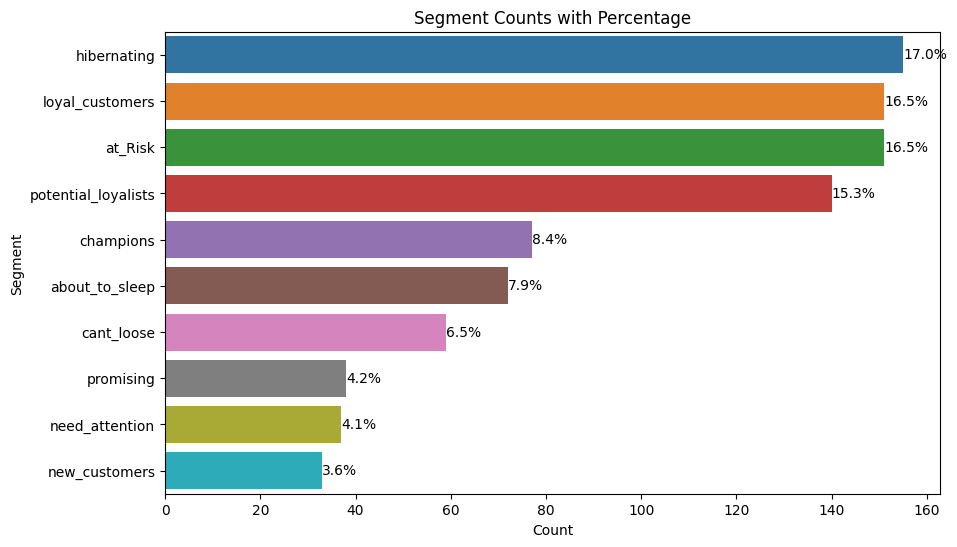

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=rfm, y="Segment", order=segment_counts.index)

total = len(rfm['Segment'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Count')
plt.ylabel('Segment')
plt.title('Segment Counts with Percentage')
plt.show();

In [19]:
df1 = df_.copy()

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.15)
    quartile3 = dataframe[variable].quantile(0.85)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    
    
replace_with_thresholds(df1, "Quantity")
replace_with_thresholds(df1, "Unit Price")

In [20]:
df1["Total Price"] = df1["Quantity"] * df1["Unit Price"]

In [21]:
df1 = df1[["Order Date", "Total Price", "Customer ID", "Order ID"]]

In [22]:
df1 = df1.groupby("Customer ID").agg({"Order Date" : [(lambda x: (x.max() - x.min()).days / 7),
                                                      (lambda x: (today_date - x.min()).days / 7)],
                                "Order ID" : lambda x: x.nunique(),
                                "Total Price" : lambda x: x.sum()})

In [23]:
df1.head()

Order Date            Order ID Total Price
               <lambda_0> <lambda_1> <lambda>    <lambda>
Customer ID                                              
00246-15080-LE     0.0000     5.7143        1    178.7100
00256-19905-YG     0.0000   187.1429        1     40.5000
00445-42781-KX     0.0000    16.2857        1    163.7200
00539-42510-RY     0.0000   129.0000        1    148.9250
00852-54571-WP     0.0000    58.1429        1      8.2500

In [24]:
df1.columns = df1.columns.droplevel(0)

In [25]:
df1.columns = ["recency_weekly", "T_weekly", "frequency", "monetary"]

In [26]:
df1 = df1[df1["frequency"] > 1]

In [27]:
df1["monetary_avg"] = df1["monetary"] / df1["frequency"]
df1.drop("monetary", axis=1, inplace=True)
df1.head()

,recency_weekly,T_weekly,frequency,monetary_avg
Customer ID,,,,
01035-70465-UO,3.4286,146.8571,2,35.8500
01841-48191-NL,0.1429,129.4286,2,23.4825
04666-71569-RI,2.1429,135.4286,2,16.6550
05325-97750-WP,86.0000,127.2857,4,45.9150
10142-55267-YO,4.7143,80.2857,2,14.2875


In [28]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(df1['frequency'],
        df1['recency_weekly'],
        df1['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 25 subjects, a: 1.08, alpha: 123.94, b: 4.55, r: 4.30>

In [29]:
df1["exp_sales_3_month"] = bgf.predict(4 * 3,
                                           df1['frequency'],
                                           df1['recency_weekly'],
                                           df1['T_weekly'])

df1["exp_sales_6_month"] = bgf.predict(4 * 6,
                                           df1['frequency'],
                                           df1['recency_weekly'],
                                           df1['T_weekly'])
df1.head()

,recency_weekly,T_weekly,frequency,monetary_avg,exp_sales_3_month,exp_sales_6_month
Customer ID,,,,,,
01035-70465-UO,3.4286,146.8571,2,35.8500,0.0116,0.0227
01841-48191-NL,0.1429,129.4286,2,23.4825,0.0158,0.0308
04666-71569-RI,2.1429,135.4286,2,16.6550,0.0148,0.0288
05325-97750-WP,86.0000,127.2857,4,45.9150,0.2369,0.4628
10142-55267-YO,4.7143,80.2857,2,14.2875,0.0786,0.1529


In [30]:
ggf = GammaGammaFitter(penalizer_coef=0.01)                
ggf.fit(df1['frequency'], df1['monetary_avg'])

df1["expected_average_profit"] = ggf.conditional_expected_average_profit(df1['frequency'],
                                                                             df1['monetary_avg'])

df1.head()

<lifetimes.GammaGammaFitter: fitted with 25 subjects, p: 3.95, q: 0.76, v: 3.78>

,recency_weekly,T_weekly,frequency,monetary_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit
Customer ID,,,,,,,
01035-70465-UO,3.4286,146.8571,2,35.8500,0.0116,0.0227,38.8968
01841-48191-NL,0.1429,129.4286,2,23.4825,0.0158,0.0308,26.1499
04666-71569-RI,2.1429,135.4286,2,16.6550,0.0148,0.0288,19.1130
05325-97750-WP,86.0000,127.2857,4,45.9150,0.2369,0.4628,47.5674
10142-55267-YO,4.7143,80.2857,2,14.2875,0.0786,0.1529,16.6729


In [31]:
df1["cltv_6w"] = ggf.customer_lifetime_value(bgf,
                                  df1['frequency'],
                                   df1['recency_weekly'],
                                   df1['T_weekly'],
                                   df1['monetary_avg'],
                                   time=6, #week 
                                   freq="W",  
                                   discount_rate=0.01)
df1.sort_values(by="cltv_6w", ascending=False).head(10)

,recency_weekly,T_weekly,frequency,monetary_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit,cltv_6w
Customer ID,,,,,,,,
57808-90533-UE,35.5714,39.0000,3,83.7083,0.4347,0.8395,86.6876,75.9676
27930-59250-JT,149.4286,154.1429,3,105.6900,0.2599,0.5088,109.1142,58.0645
32743-78448-KT,0.8571,23.4286,2,81.0875,0.3172,0.6106,85.5218,54.4837
86579-92122-OC,162.8571,173.1429,4,76.7612,0.2758,0.5406,78.8796,44.6093
19485-98072-PS,75.8571,130.7143,3,92.6700,0.1708,0.3337,95.8307,33.4414
52143-35672-JF,94.7143,130.0000,2,76.7675,0.1941,0.3793,81.0693,32.1525
16880-78077-FB,71.5714,132.5714,3,96.3700,0.1520,0.2970,99.6056,30.9374
27132-68907-RC,107.2857,167.1429,2,103.3000,0.1392,0.2727,108.4156,30.9323
65732-22589-OW,142.7143,163.8571,2,67.5050,0.1958,0.3837,71.5227,28.7062


In [32]:
df1["cltv_6m"] = ggf.customer_lifetime_value(bgf,
                                  df1['frequency'],
                                   df1['recency_weekly'],
                                   df1['T_weekly'],
                                   df1['monetary_avg'],
                                   time=6*4, #month  
                                   freq="W",  
                                   discount_rate=0.01)
df1.sort_values(by="cltv_6m", ascending=False).head(10)

,recency_weekly,T_weekly,frequency,monetary_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit,cltv_6w,cltv_6m
Customer ID,,,,,,,,,
57808-90533-UE,35.5714,39.0000,3,83.7083,0.4347,0.8395,86.6876,75.9676,232.4977
27930-59250-JT,149.4286,154.1429,3,105.6900,0.2599,0.5088,109.1142,58.0645,189.3589
32743-78448-KT,0.8571,23.4286,2,81.0875,0.3172,0.6106,85.5218,54.4837,164.4991
86579-92122-OC,162.8571,173.1429,4,76.7612,0.2758,0.5406,78.8796,44.6093,146.3541
19485-98072-PS,75.8571,130.7143,3,92.6700,0.1708,0.3337,95.8307,33.4414,108.0819
52143-35672-JF,94.7143,130.0000,2,76.7675,0.1941,0.3793,81.0693,32.1525,103.9453
27132-68907-RC,107.2857,167.1429,2,103.3000,0.1392,0.2727,108.4156,30.9323,101.3789
16880-78077-FB,71.5714,132.5714,3,96.3700,0.1520,0.2970,99.6056,30.9374,100.0655
65732-22589-OW,142.7143,163.8571,2,67.5050,0.1958,0.3837,71.5227,28.7062,93.9807
